In [3]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Membaca Data

In [4]:
df= pd.read_csv('/content/drive/MyDrive/Learn/loan_data.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Informasi Fitur Data

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## **Exploratory Data Analysis**

### Melihat status kredit peminjam

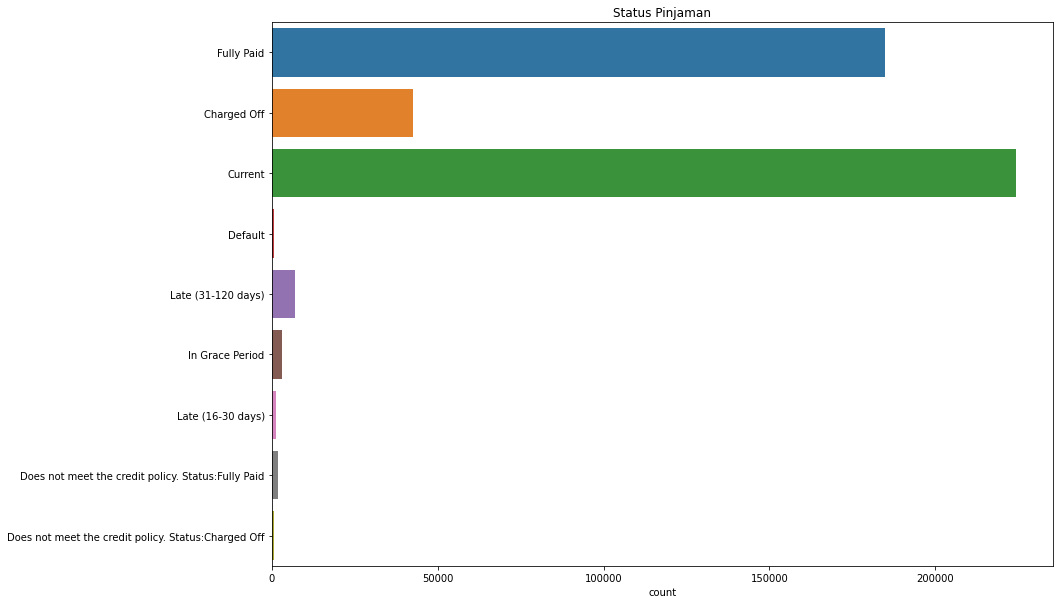

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


In [107]:
plt.figure(figsize=(14, 10))
plt.title("Status Pinjaman")
ax = sns.countplot(data=df, y=df['loan_status'])
plt.ylabel("")
plt.show()
value_counts = df['loan_status'].value_counts()
print(value_counts)

Dari kategori loan_status diata, dapat dikelompokkan kedalam status berikut:

Disetujui: Fully Paid: 1

Ditolak: Charged Off, Default, dan Does not meet the credit policy: 0 

In [108]:
status = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':-1,
               'In Grace Period':-1,
               'Late (16-30 days)':-1}
# Create the mapped values in a new column
df['loan_status'] = df['loan_status'].map(status)
df = df.drop(df[df.loan_status == -1].index)

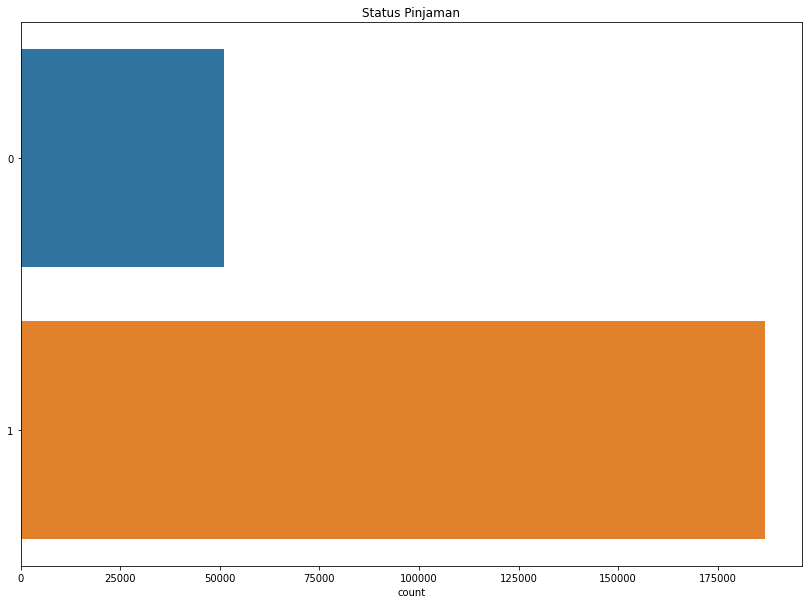

1    78.557395
0    21.442605
Name: loan_status, dtype: float64 %


In [109]:
plt.figure(figsize=(14, 10))
plt.title("Status Pinjaman")
ax = sns.countplot(data=df, y=df['loan_status'])
plt.ylabel("")
plt.show()
value_counts = df['loan_status'].value_counts()
print((value_counts/value_counts.sum())*100,"%")

### Tujuan Mengambil Pinjaman

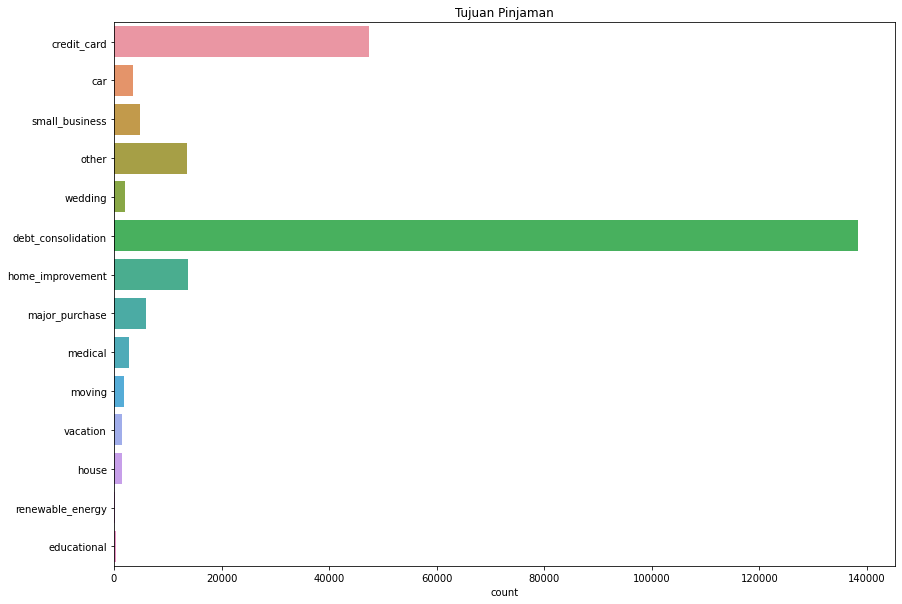

debt_consolidation    58.191380
credit_card           19.950357
home_improvement       5.815856
other                  5.736343
major_purchase         2.503629
small_business         2.005091
car                    1.471634
medical                1.138434
wedding                0.848566
moving                 0.795978
house                  0.644944
vacation               0.612550
educational            0.177538
renewable_energy       0.107701
Name: purpose, dtype: float64 %


In [110]:
plt.figure(figsize=(14, 10))
plt.title("Tujuan Pinjaman")
ax = sns.countplot(data=df, y=df['purpose'])
plt.ylabel("")
plt.show()
value_counts = df['purpose'].value_counts()
print((value_counts/value_counts.sum())*100,"%")

### Distribusi Waktu Pekerjaan Kreditur

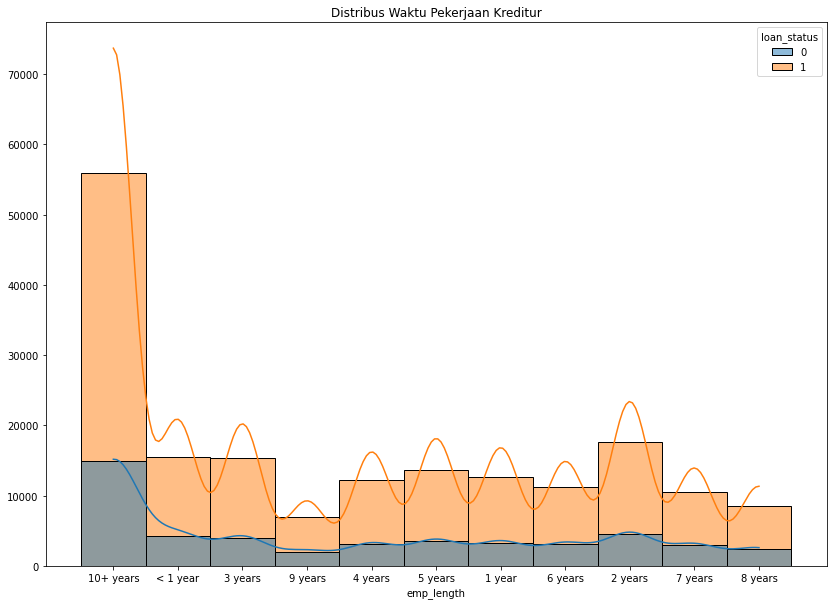

In [111]:
plt.figure(figsize=(14, 10))
plt.title("Distribus Waktu Pekerjaan Kreditur")
sns.histplot(data=df, x='emp_length', hue='loan_status', kde=True)
plt.ylabel("")
plt.show()

## Distribusi Total pinjaman

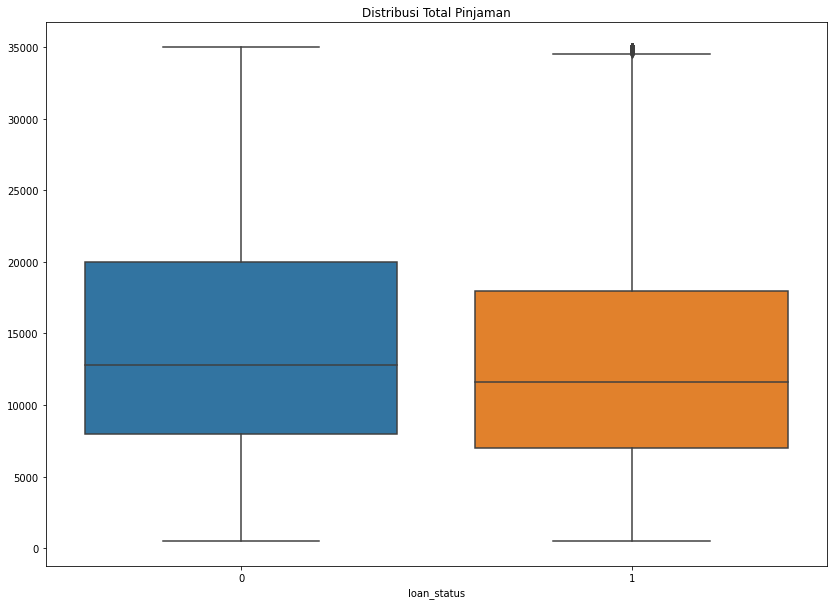

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50968.0,14596.853908,8380.232557,500.0,8000.0,12800.0,20000.0,35000.0
1,186727.0,13167.962855,7944.742527,500.0,7000.0,11625.0,18000.0,35000.0


In [112]:
plt.figure(figsize=(14, 10))
plt.title(label ="Distribusi Total Pinjaman")
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.ylabel("")
plt.show()
df.groupby('loan_status')['loan_amnt'].describe()

Hasil: Rata-rata jumlah pinjaman terbanyak adalah milik "bad loan"

### Distribusi Pembayaran yang diterima Perusahaan

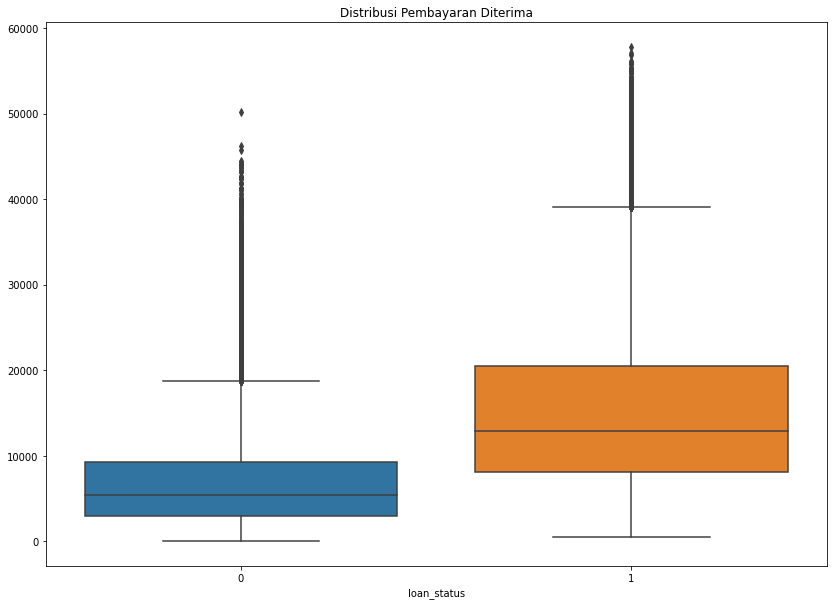

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50968.0,6952.967614,5619.169813,0.00,2981.6775,5431.95000,9282.86250,50197.03000
1,186727.0,15160.113585,9452.545563,503.54,8035.1450,12930.93777,20429.38559,57777.57987


In [113]:
plt.figure(figsize=(14, 10))
plt.title(label ="Distribusi Pembayaran Diterima")
sns.boxplot(data=df, x='loan_status', y='total_pymnt')
plt.ylabel("")
plt.show()
df.groupby('loan_status')['total_pymnt'].describe()

Hasil: Rata-rata pembayaran kredit yang diterima oleh perusaahan adalah dari kreditur 'good loan'

### **Data Preparation**

In [6]:
clean_df = df
# Dari informasi data, terdapat kolom yang bernilai kosong semua
# Menghapus kolom yang nilainya kosong semua
clean_df = df.dropna(axis=1, how='all')
pd.DataFrame(clean_df.isnull().sum())

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0


In [7]:
# Menghapus kolom yang nilainya unik semua
df.nunique()
# kolom Unnamed: 0, id, member_id, url
clean_df = clean_df.drop(['Unnamed: 0','id','member_id','url'], axis=1)
pd.DataFrame(clean_df.nunique())

,0
loan_amnt,1352
funded_amnt,1354
funded_amnt_inv,9854
term,2
int_rate,506
installment,55622
grade,7
sub_grade,35
emp_title,205475
emp_length,11


In [8]:
# Menghapus kolom yang nilai kategorinya terlalu banyak
df.select_dtypes(include='object').nunique()
# Kolom yang nilai kategori lebih dari 50000: emp_tittle, url, desc, tittle
clean_df = clean_df.drop(['emp_title','desc','title'], axis=1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

In [9]:
# Menghapus kolom yang memiliki satu nilai
for col in clean_df.columns:
    if len(clean_df[col].unique()) == 1:
        clean_df.drop(col,inplace=True,axis=1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

In [10]:
# Menghapus kolom yang nilai kategorinya terlalu banyak
pd.DataFrame(clean_df.isnull().sum())
# Kolom yang nilai kosongnya banyak
clean_df = clean_df.drop(['emp_length','mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'], axis=1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   home_ownership              466285 non-null  object 
 9   annual_inc                  466281 non-null  float64
 10  verification_status         466285 non-null  object 
 11  issue_d                     466285 non-null  object 
 12  loan_status                 466285 non-null  object 
 13  pymnt_plan    

### Mengisi Nilai Kosong

In [11]:
# mengisi nilai kosong
obj = clean_df.select_dtypes(include=float).columns.to_list()
# uni_dist = clean_df[clean_df.columns[clean_df.columns.isin(obj)]]
clean_df[obj] = clean_df[obj].fillna(clean_df[obj].mean())
# fig = plt.figure(figsize = (40,10))
# sns.heatmap(uni_dist.corr(),cmap='afmhot', annot = True);

In [12]:
clean_df["earliest_cr_line"] = clean_df["earliest_cr_line"].fillna("unknown")
clean_df["last_pymnt_d"] = clean_df["last_pymnt_d"].fillna("unknown")
clean_df["next_pymnt_d"] = clean_df["next_pymnt_d"].fillna("unknown")
clean_df["last_credit_pull_d"] = clean_df["last_credit_pull_d"].fillna("unknown")

In [17]:
label = clean_df['loan_status']
features = clean_df.loc[:, clean_df.columns != 'loan_status']
obj = features.select_dtypes(include=object).columns
num = features.select_dtypes(exclude=object).columns
obj = pd.get_dummies(features[obj])
num = (df[num]-df[num].mean())/df[num].std()
features_full = pd.concat([num, obj], axis=1)
features_full

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,last_credit_pull_d_Sep-07,last_credit_pull_d_Sep-08,last_credit_pull_d_Sep-09,last_credit_pull_d_Sep-10,last_credit_pull_d_Sep-11,last_credit_pull_d_Sep-12,last_credit_pull_d_Sep-13,last_credit_pull_d_Sep-14,last_credit_pull_d_Sep-15,last_credit_pull_d_unknown
0,-1.124391,-1.122962,-1.114453,-0.729586,-1.105574,-0.896546,1.328631,-0.357024,0.178871,-1.641509,...,0,0,0,0,0,0,0,0,0,0
1,-1.426086,-1.425099,-1.412731,0.330633,-1.528761,-0.787383,-2.065789,-0.357024,3.843223,-1.641509,...,0,0,0,0,0,0,1,0,0,0
2,-1.438154,-1.437185,-1.424783,0.488978,-1.428139,-1.110288,-1.082490,-0.357024,1.094959,-1.842009,...,0,0,0,0,0,0,0,0,0,0
3,-0.521001,-0.518686,-0.508859,-0.077850,-0.380931,-0.438061,0.354248,-0.357024,0.178871,-0.238008,...,0,0,0,0,0,0,0,0,0,0
4,-1.365747,-1.364672,-1.352473,-0.261437,-1.496069,0.122310,0.091865,-0.357024,-0.737217,0.764493,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.492695,0.496497,0.503477,0.147046,0.002377,0.668127,0.335142,-0.357024,1.094959,1.365994,...,0,0,0,0,0,0,0,0,0,0
466281,0.927136,0.931575,0.937335,1.409212,0.617855,0.085923,0.156824,-0.357024,3.843223,1.365994,...,0,0,0,0,0,0,0,0,0,0
466282,0.770255,0.774464,0.780664,0.725347,0.337921,-0.496281,1.073890,-0.357024,1.094959,1.365994,...,0,0,0,0,0,0,0,0,0,0
466283,-1.486425,-1.485527,-1.472989,-1.360670,-1.517426,0.176892,-1.506633,3.405368,0.178871,1.967495,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_full, label, test_size=0.25, random_state=42)

NameError: ignored

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_true=y_train, y_pred=clf.predict(X_train))
print(report)

NameError: ignored